In [1]:
import numpy as np
from numpy import random
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

Изучение зависимости роста числа обусловленности случайной матрицы от ее порядка

Cоздадим функцию, которая вычислит манхеттенское число обусловленности матрицы:

In [5]:
def cond(A):
    return linalg.norm(A, 1)*linalg.norm(linalg.inv(A), 1)

Будем генерировать матрицы порядков от 1 до max.

In [11]:
max=200
n_vector = np.arange(1, max+1)

Построим график зависимости числа обусловленности от порядка матрицы со случайными элементами, которые распределенны по нормальному закону с математическим ожиданием 0 и средним квадратическим отклонением 1.

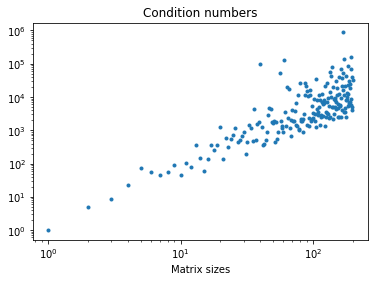

In [12]:
cond_array = []
for n in n_vector:
  A=random.randn(n,n)
  cond_array.append(cond(A))
plt.title("Condition numbers")
plt.xlabel("Matrix sizes")
plt.loglog(n_vector,cond_array,'.')
pass

Видим, что большинство лежат между двумя прямыми. Так как используем двойную логарифмическую шкалу, прямые являются графиками показательных функций от n. В среднем, cond1An растет как показательная функция от n. Подберем такие c1, c2, p, что для большинства матриц
                     c1n^p <= cond1An <= c2n^p 
                     
Коэффициенты c1 и c2 отвечают за смещение прямых вдоль оси ординат, p - за угол наклона.

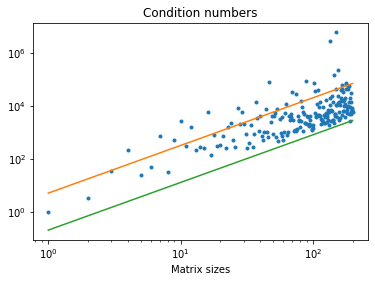

In [14]:
c1=5
c2=0.2
p=1.8
l1=c1*(n_vector**p)
l2=c2*(n_vector**p)
cond_array = []
for n in n_vector:
  A=random.randn(n,n)
  cond_array.append(cond(A))
plt.title("Condition numbers")
plt.xlabel("Matrix sizes")
plt.loglog(n_vector,cond_array,'.')
plt.loglog(n_vector,l1)
plt.loglog(n_vector,l2)
pass

Выводы:

Мы выяснили, что cond1An в среднем растет как показательная функция от n.

Если c1 = c2 = 1, прямые будут проходить через центр скопления.
Следовательно, в среднем, cond1An растет как функция n^2 (p=1.8).
Итоговые значения параметров c1 и c2 соответственно в k раз больше и меньше 1, где k = 5.